In [1]:
#APPENDIX C

#hassas48, 400188482, Shaheer Hassan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

#read covidcases csv file from folder
covidcases = pd.read_csv('covidcases.csv')

#replace all the '_' in the columns with a ' '
covidcases.columns = covidcases.columns.str.replace('[_]', ' ')

#fill all NA values with an int value of 0
remove_null=covidcases.fillna(0)
#remove_null.info

#Cleaning Files Steps to format files for time series (halton)

cleaned=remove_null.drop(remove_null.columns[[range(1,9,1)]], axis=1)
cleaned_1=cleaned.drop(remove_null.columns[[range(10,36)]], axis=1)
cleaned_halton=cleaned_1.drop(labels=range(0,648),axis=0)
cleaned_halton.reset_index(drop=True, inplace=True)

#cleaning files step for format files for time series (hamilton) 

cleaned_hamilton = remove_null.drop(remove_null.columns[[range(1,10,1)]], axis=1)
cleaned_hamilton1 = cleaned_hamilton.drop(remove_null.columns[[range(11,36)]],axis=1)
cleaned_hamilton2=cleaned_hamilton1.drop(labels=range(0,648),axis=0)
cleaned_hamilton2.reset_index(drop=True, inplace=True)


#Format dataframe to calculate means for all municipalities for bar graph 
cleaned_mean=remove_null.drop(remove_null.columns[[0,35]],axis=1)
mean=cleaned_mean.mean() # calculate mean value of all the covid cases for each municipality 
mean=mean.sort_values(ascending=False) # sort all series values in ascending order for a horizontal graph (see below)

/var/folders/sr/86gs7_1919s2gg4sthkwfh780000gn/T/ipykernel_29034/321893348.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  covidcases.columns = covidcases.columns.str.replace('[_]', ' ')
/Users/shaheerhassan/opt/anaconda3/envs/IBEHS4C03/lib/python3.8/site-packages/pandas/core/indexes/base.py:5055: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)
/Users/shaheerhassan/opt/anaconda3/envs/IBEHS4C03/lib/python3.8/site-packages/pandas/core/indexes/base.py:5055: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either i

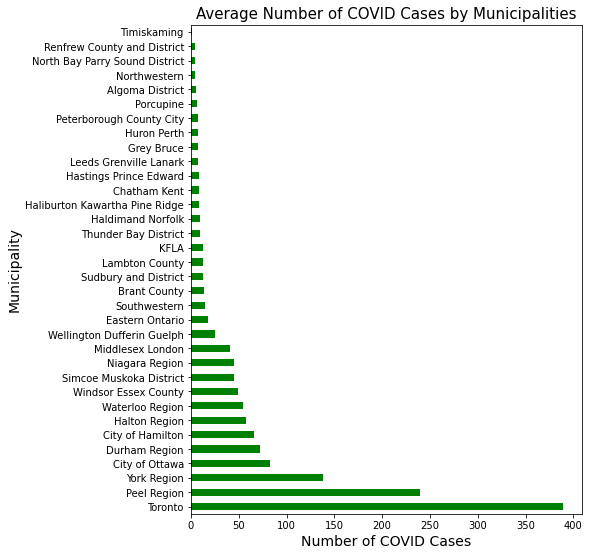

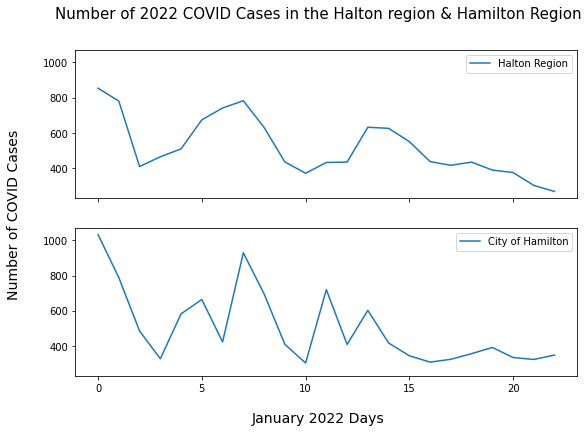

In [2]:
#Graphing Code 
plt.close('all')
fig1 = plt.figure()
bar_graph=mean.plot.barh(figsize=(7,9), fontsize=10, color='green', rot=0)
plt.ylabel("Municipality",size=14)
plt.xlabel("Number of COVID Cases", size=14)
plt.title("Average Number of COVID Cases by Municipalities", size=15)
plt.savefig('BarplotQ3.jpg', dpi=300, format='jpg', bbox_inches = 'tight', transparent='false')
plt.show()

fig2, axes = plt.subplots(2, sharex=True, sharey=True, figsize=(9,6), linewidth=1)
cleaned_halton.plot(ax=axes[0])
cleaned_hamilton2.plot(ax=axes[1])
fig2.supxlabel("January 2022 Days", size=14)
fig2.supylabel("Number of COVID Cases", size=14)
fig2.suptitle("Number of 2022 COVID Cases in the Halton region & Hamilton Region", size=15)
plt.savefig('TSQ3.jpg', dpi=300, format='jpg', bbox_inches = 'tight', transparent='false')
plt.show()

